# Exercise 4-3: Polynomial Regression

## Step 1: Problem Analysis and Framing

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [5]:
# Importing the dataset
df = pd.read_csv('../../data/salaries.csv')

In [6]:
df.shape

(10, 3)

In [7]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [8]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
"""
# Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
"""

'\n# Scaling\nfrom sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\n'

In [11]:
# Fitting Linear Regression to the dataset

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

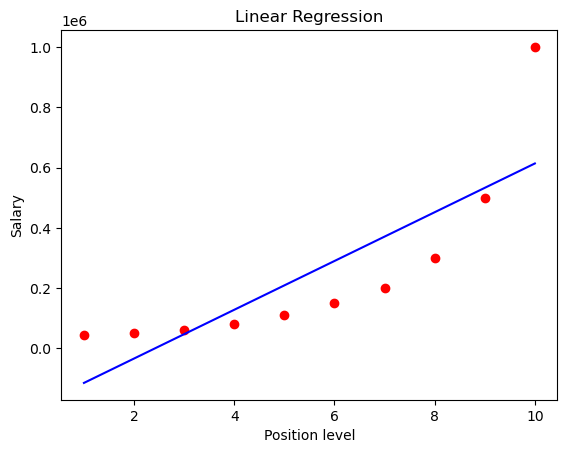

In [12]:
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Linear Regression')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

Obviously, bad fit.

In [19]:
# Fitting Polynomial Regression to the dataset

poly_model = PolynomialFeatures(degree=5)
X_poly = poly_model.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [20]:
y_predict = pol_reg.predict(X_poly)

In [21]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, y_predict , color='blue')
    plt.title('Polynomia Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return

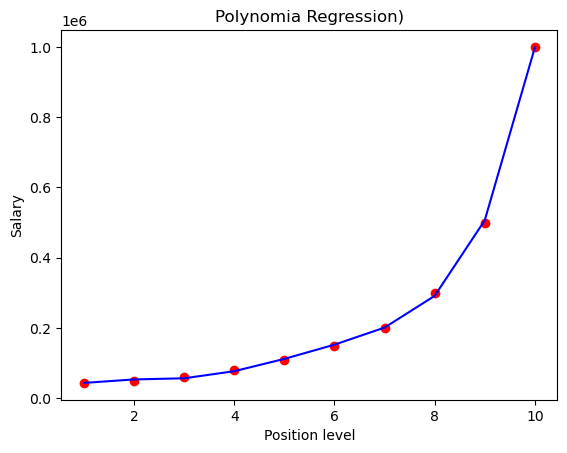

In [22]:
viz_polymonial()

In [25]:
# Additional feature
# Making the plot line more smooth
def viz_polymonial_smooth(pol_reg):
    X_grid = np.arange(min(X), max(X), 0.1)
    X_grid = X_grid.reshape(len(X_grid), 1) #Why do we need to reshape? (https://www.tutorialspoint.com/numpy/numpy_reshape.htm)
    # Visualizing the Polymonial Regression results
    plt.scatter(X, y, color='red')
    plt.plot(X_grid, pol_reg.predict(pol_reg.fit_transform(X_grid)), color='blue')
    plt.title('Polynomial Regression')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return

AttributeError: 'LinearRegression' object has no attribute 'fit_transform'

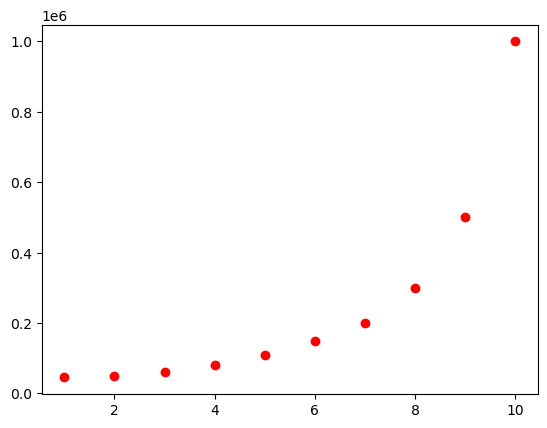

In [27]:
viz_polymonial_smooth(pol_reg)

In [ ]:
# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])
#output would be 249500

In [ ]:
# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_model.fit_transform([[5.5]]))
#output should be 132148.43750003